# Logistic Regression Example

### 导包

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
tf.compat.v1.disable_eager_execution()
from tensorflow.examples.tutorials.mnist import input_data

In [2]:
mnist=input_data.read_data_sets('mnist')


Instructions for updating:
Please use alternatives such as: tensorflow_datasets.load('mnist')
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting mnist\train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting mnist\train-labels-idx1-ubyte.gz
Extracting mnist\t10k-images-idx3-ubyte.gz
Extracting mnist\t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/_DataSet.py from tensorflow/models.


In [3]:
images=mnist.train.images
images.shape

(55000, 784)

In [4]:
mnist.train.labels

array([7, 3, 4, ..., 5, 6, 8], dtype=uint8)

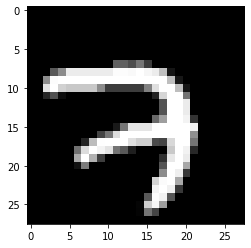

In [5]:
plt.imshow(images[0].reshape(28,28),cmap="gray")

In [6]:
mnist=input_data.read_data_sets("mnist",one_hot=True)

Extracting mnist\train-images-idx3-ubyte.gz
Extracting mnist\train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting mnist\t10k-images-idx3-ubyte.gz
Extracting mnist\t10k-labels-idx1-ubyte.gz


In [7]:
mnist.train.images.shape

(55000, 784)

In [8]:
mnist.train.labels.shape

(55000, 10)

In [9]:
# one hot 独热编码
mnist.train.labels[:10]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]])

### 声明graph、Softmax、最小化Cross Entroy（交叉熵）

In [10]:
a=np.array([-3,1,3.0])

In [11]:
b=tf.nn.softmax(a)
# softmax 将数据转化成了概率 同时概率之和是1
# 支持向量机 专一
# softmax 所有的都不放过 计算概率
with tf.compat.v1.Session() as sess:
    res=sess.run(b)
    print(res)
    print(res.sum())

[0.00217852 0.11894324 0.87887824]
1.0


In [12]:
np.e**a/(np.e**a).sum()

array([0.00217852, 0.11894324, 0.87887824])

In [13]:
# tf.nn.softmax(a) --->>  np.e**a/(np.e**a).sum()

In [14]:
X=tf.compat.v1.placeholder(dtype=tf.float64,shape=[None,784])
y=tf.compat.v1.placeholder(dtype=tf.float64,shape=[None,10])
w=tf.Variable(initial_value=tf.random.normal(shape=[784,10],dtype=tf.float64),dtype=tf.float64)
b=tf.Variable(initial_value=tf.random.normal(shape=[10],dtype=tf.float64),dtype=tf.float64)


In [15]:
pred=tf.matmul(X,w)+b
y_=tf.nn.softmax(pred)
# 概率 每个样本概率和等于1
y_
# y 真实分布


<tf.Tensor 'Softmax_1:0' shape=(None, 10) dtype=float64>

In [16]:
# 交叉熵进行计算
cost=tf.reduce_mean(tf.reduce_sum(tf.multiply(y,tf.math.log(1/y_)),axis=-1))
cost

<tf.Tensor 'Mean:0' shape=() dtype=float64>

In [17]:
gd=tf.compat.v1.train.GradientDescentOptimizer(0.01)

In [18]:
# 让交叉熵最小
optimizer=gd.minimize(cost)
optimizer

<tf.Operation 'GradientDescent' type=NoOp>

### 初始化TensorFlow进行运算

In [19]:
x_train,y_train=mnist.train.next_batch(batch_size=550)

display(x_train.shape,y_train.shape)

(550, 784)

(550, 10)

In [20]:
saver=tf.compat.v1.train.Saver()

In [22]:
with tf.compat.v1.Session(config=tf.compat.v1.ConfigProto(log_device_placement=True)) as sess:
    sess.run(tf.compat.v1.global_variables_initializer())
    
    for i in range(1000):
        for j in range(100):
            x_train,y_train=mnist.train.next_batch(batch_size=550)
            optimizer_,cost_=sess.run(fetches=[optimizer,cost],feed_dict={
                X:x_train,
                y:y_train
            })
        print("循环%d次,损失函数值是: %0.2f"%(i,cost_))
        # 9 19 29 39 49 ... 99
        if (i+1)%10==0:
            saver.save(sess,save_path='./model/estimator',global_step=i)

Device mapping:
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: NVIDIA GeForce GTX 1660 Ti, pci bus id: 0000:01:00.0, compute capability: 7.5

循环0次,损失函数值是: 9.09
循环1次,损失函数值是: 7.68
循环2次,损失函数值是: 6.88
循环3次,损失函数值是: 6.09
循环4次,损失函数值是: 5.21
循环5次,损失函数值是: 4.44
循环6次,损失函数值是: 4.54
循环7次,损失函数值是: 3.95
循环8次,损失函数值是: 3.46
循环9次,损失函数值是: 3.42
循环10次,损失函数值是: 3.03
循环11次,损失函数值是: 2.96
循环12次,损失函数值是: 2.76
循环13次,损失函数值是: 2.86
循环14次,损失函数值是: 2.63
循环15次,损失函数值是: 2.62
循环16次,损失函数值是: 2.37
循环17次,损失函数值是: 2.16
循环18次,损失函数值是: 2.08
循环19次,损失函数值是: 2.13
循环20次,损失函数值是: 1.97
循环21次,损失函数值是: 2.35
循环22次,损失函数值是: 2.02
循环23次,损失函数值是: 2.04
循环24次,损失函数值是: 1.82
循环25次,损失函数值是: 1.98
循环26次,损失函数值是: 1.81
循环27次,损失函数值是: 1.86
循环28次,损失函数值是: 1.57
循环29次,损失函数值是: 1.68
循环30次,损失函数值是: 1.65
循环31次,损失函数值是: 1.72
循环32次,损失函数值是: 1.55
循环33次,损失函数值是: 1.44
循环34次,损失函数值是: 1.41
循环35次,损失函数值是: 1.60
循环36次,损失函数值是: 1.60
循环37次,损失函数值是: 1.33
循环38次,损失函数值是: 1.44
循环39次,损失函数值是: 1.51
循环40次,损失函数值是: 1.59
循环41次,损失函数值是: 1.42
循环42次,损失函数值是: 1.46
循环43次,损失函数值是: 1.33
循环44次,损失函数值是: 

循环391次,损失函数值是: 0.53
循环392次,损失函数值是: 0.70
循环393次,损失函数值是: 0.57
循环394次,损失函数值是: 0.69
循环395次,损失函数值是: 0.61
循环396次,损失函数值是: 0.52
循环397次,损失函数值是: 0.55
循环398次,损失函数值是: 0.66
循环399次,损失函数值是: 0.69
循环400次,损失函数值是: 0.61
循环401次,损失函数值是: 0.67
循环402次,损失函数值是: 0.46
循环403次,损失函数值是: 0.54
循环404次,损失函数值是: 0.50
循环405次,损失函数值是: 0.35
循环406次,损失函数值是: 0.49
循环407次,损失函数值是: 0.59
循环408次,损失函数值是: 0.41
循环409次,损失函数值是: 0.57
循环410次,损失函数值是: 0.47
循环411次,损失函数值是: 0.52
循环412次,损失函数值是: 0.54
循环413次,损失函数值是: 0.48
循环414次,损失函数值是: 0.62
循环415次,损失函数值是: 0.68
循环416次,损失函数值是: 0.56
循环417次,损失函数值是: 0.58
循环418次,损失函数值是: 0.64
循环419次,损失函数值是: 0.56
循环420次,损失函数值是: 0.59
循环421次,损失函数值是: 0.43
循环422次,损失函数值是: 0.55
循环423次,损失函数值是: 0.72
循环424次,损失函数值是: 0.57
循环425次,损失函数值是: 0.67
循环426次,损失函数值是: 0.67
循环427次,损失函数值是: 0.57
循环428次,损失函数值是: 0.55
循环429次,损失函数值是: 0.51
循环430次,损失函数值是: 0.55
循环431次,损失函数值是: 0.56
循环432次,损失函数值是: 0.59
循环433次,损失函数值是: 0.51
循环434次,损失函数值是: 0.57
循环435次,损失函数值是: 0.64
循环436次,损失函数值是: 0.53
循环437次,损失函数值是: 0.62
循环438次,损失函数值是: 0.50
循环439次,损失函数值是: 0.71
循环440次,损失函数值是: 0.63


循环801次,损失函数值是: 0.43
循环802次,损失函数值是: 0.47
循环803次,损失函数值是: 0.39
循环804次,损失函数值是: 0.51
循环805次,损失函数值是: 0.46
循环806次,损失函数值是: 0.44
循环807次,损失函数值是: 0.37
循环808次,损失函数值是: 0.45
循环809次,损失函数值是: 0.39
循环810次,损失函数值是: 0.44
循环811次,损失函数值是: 0.48
循环812次,损失函数值是: 0.38
循环813次,损失函数值是: 0.42
循环814次,损失函数值是: 0.57
循环815次,损失函数值是: 0.45
循环816次,损失函数值是: 0.41
循环817次,损失函数值是: 0.42
循环818次,损失函数值是: 0.47
循环819次,损失函数值是: 0.52
循环820次,损失函数值是: 0.47
循环821次,损失函数值是: 0.42
循环822次,损失函数值是: 0.48
循环823次,损失函数值是: 0.38
循环824次,损失函数值是: 0.64
循环825次,损失函数值是: 0.40
循环826次,损失函数值是: 0.44
循环827次,损失函数值是: 0.46
循环828次,损失函数值是: 0.35
循环829次,损失函数值是: 0.47
循环830次,损失函数值是: 0.49
循环831次,损失函数值是: 0.54
循环832次,损失函数值是: 0.42
循环833次,损失函数值是: 0.38
循环834次,损失函数值是: 0.48
循环835次,损失函数值是: 0.32
循环836次,损失函数值是: 0.42
循环837次,损失函数值是: 0.45
循环838次,损失函数值是: 0.35
循环839次,损失函数值是: 0.41
循环840次,损失函数值是: 0.41
循环841次,损失函数值是: 0.54
循环842次,损失函数值是: 0.54
循环843次,损失函数值是: 0.50
循环844次,损失函数值是: 0.49
循环845次,损失函数值是: 0.45
循环846次,损失函数值是: 0.40
循环847次,损失函数值是: 0.34
循环848次,损失函数值是: 0.47
循环849次,损失函数值是: 0.48
循环850次,损失函数值是: 0.49


In [31]:
with tf.compat.v1.Session() as sess:
#     sess.run(tf.compat.v1.global_variables_initializer())
    saver.restore(sess,save_path="./model/estimator-599")
    for i in range(600,900):
        for j in range(100):
            x_train,y_train=mnist.train.next_batch(batch_size=550)
            optimizer_,cost_=sess.run(fetches=[optimizer,cost],feed_dict={
                X:x_train,
                y:y_train
            })
        print("循环%d次,损失函数值是: %0.2f"%(i,cost_))
        # 9 19 29 39 49 ... 99
        if (i+1)%10==0:
            saver.save(sess,save_path='./model/estimator',global_step=i)
             

INFO:tensorflow:Restoring parameters from ./model/estimator-599
循环600次,损失函数值是: 0.47
循环601次,损失函数值是: 0.55
循环602次,损失函数值是: 0.58
循环603次,损失函数值是: 0.48
循环604次,损失函数值是: 0.57
循环605次,损失函数值是: 0.60
循环606次,损失函数值是: 0.61
循环607次,损失函数值是: 0.58
循环608次,损失函数值是: 0.56
循环609次,损失函数值是: 0.53
循环610次,损失函数值是: 0.41
循环611次,损失函数值是: 0.51
循环612次,损失函数值是: 0.44
循环613次,损失函数值是: 0.47
循环614次,损失函数值是: 0.53
循环615次,损失函数值是: 0.43
循环616次,损失函数值是: 0.43
循环617次,损失函数值是: 0.46
循环618次,损失函数值是: 0.48
循环619次,损失函数值是: 0.41
循环620次,损失函数值是: 0.57
循环621次,损失函数值是: 0.41
循环622次,损失函数值是: 0.47
循环623次,损失函数值是: 0.41
循环624次,损失函数值是: 0.53
循环625次,损失函数值是: 0.43
循环626次,损失函数值是: 0.47
循环627次,损失函数值是: 0.35
循环628次,损失函数值是: 0.47
循环629次,损失函数值是: 0.55
循环630次,损失函数值是: 0.54
循环631次,损失函数值是: 0.53
循环632次,损失函数值是: 0.39
循环633次,损失函数值是: 0.56
循环634次,损失函数值是: 0.43
循环635次,损失函数值是: 0.48
循环636次,损失函数值是: 0.47
循环637次,损失函数值是: 0.56
循环638次,损失函数值是: 0.56
循环639次,损失函数值是: 0.49
循环640次,损失函数值是: 0.55
循环641次,损失函数值是: 0.40
循环642次,损失函数值是: 0.37
循环643次,损失函数值是: 0.43
循环644次,损失函数值是: 0.62
循环645次,损失函数值是: 0.41
循环646次,损失函数值是: 0

### 计算准确率  
#### argmax cast  reduce_mean

In [23]:
with tf.compat.v1.Session() as sess:
    saver.restore(sess,save_path="./model/estimator-999")
    x_test,y_test=mnist.test.next_batch(2000)
    # 计算准确率
    prob_=sess.run(fetches=y_,feed_dict={X:x_test})
    print(prob_[:10])
    number_=np.argmax(prob_,axis=-1)
    y_test=np.argmax(y_test,axis=-1)
    print("Score : ",(y_test==number_).mean())
    # 599 0.8865
    # 899  0.891

INFO:tensorflow:Restoring parameters from ./model/estimator-999
[[9.99533064e-01 1.59328191e-14 2.95683490e-09 7.39268471e-09
  3.84956479e-14 4.64824428e-04 1.51332672e-13 4.88161459e-15
  2.10126939e-06 6.12433249e-11]
 [2.08698183e-10 2.92791097e-11 6.74004825e-07 1.48999009e-03
  2.97160067e-11 3.64341920e-09 2.62952058e-16 9.98275432e-01
  1.26554110e-07 2.33773813e-04]
 [9.93810927e-01 7.22181704e-15 4.76153829e-06 1.32477614e-04
  5.68805123e-09 6.03583849e-03 9.39029639e-06 5.65722319e-14
  6.59950027e-06 3.70873090e-10]
 [2.53782682e-09 1.35862977e-10 4.82649147e-04 2.34584280e-08
  9.40610929e-11 9.90879964e-05 7.22414072e-10 1.77855437e-13
  9.99418151e-01 8.49708194e-08]
 [1.75182794e-11 6.06248597e-08 7.15280398e-08 9.99976798e-01
  1.45274702e-09 5.98780247e-06 4.40451563e-13 9.37861805e-06
  7.34227196e-06 3.60146326e-07]
 [6.62617826e-14 9.96290923e-01 3.63588372e-05 3.17273779e-03
  7.30903056e-09 2.13662070e-05 3.37879716e-05 3.82681379e-07
  4.42286747e-04 2.14898882